In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from random import seed
from random import choice

In [57]:
mul = pd.read_csv('test.chr1.mul.wig', sep='\t')
mul_arr = mul["fixedStep chrom=chr1 start=1 step=1"]

In [58]:
mur = pd.read_csv('test.chr1.mur.wig', sep='\t')
mur_arr = mur["fixedStep chrom=chr1 start=56 step=1"]

In [4]:
def singleMap(read_length:int):
    single_logic = []
    for i in range(len(mul_arr)):
        if mul_arr[i] <= read_length or \
        i + read_length - 1 >= 56 and \
        i + read_length - 1 <= len(mur_arr) - 1 and \
        mur_arr[i + read_length - 1] <= read_length:
            single_logic.append(True) # Read maps uniquely
        else:
            single_logic.append(False) # Read does not map uniquely
    return (len(single_logic) - sum(single_logic)) / len(single_logic)

single_arr = []
for x in range(1,301):
    single_arr.append(singleMap(x))
#print(single_arr)

In [96]:
def pairMap(read_length:int, fragment_length:int, fragment_std:int):
    np.random.seed(0)
    pair_logic = []
    distr = np.random.normal(fragment_length, fragment_std, len(mul_arr))
    for i in range(len(mul_arr)):
        if mul_arr[i] <= read_length or \
        i + int(distr[i]) - 1 <= len(mur_arr) - 1 and \
        mur_arr[i + int(distr[i]) - 1] <= read_length:
            pair_logic.append(True) # Read maps uniquely
        else:
            pair_logic.append(False) # Read does not map uniquely
    return (len(pair_logic) - sum(pair_logic)) / len(pair_logic)

pair_arr = []
for x in range(1,301):
    pair_arr.append(pairMap(x, 700, 50))

In [97]:
#Mate Pair
mate_pair_arr = []
for x in range(1,301):
    mate_pair_arr.append(pairMap(x, 2000, 50))

In [100]:
print(singleMap(50))
print(pairMap(50, 700, 50))
print(singleMap(75))
print(pairMap(75, 700, 50))
print(singleMap(150))
print(pairMap(150, 700, 50))

0.8118811881188119
0.7965796579657966
0.7044704470447045
0.6423642364236424
0.5095509550955095
0.34393439343934396


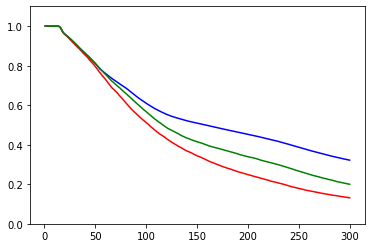

In [99]:
x = list(range(1,301))
plt.ylim([0, 1.1])
plt.plot(x, single_arr, color="blue")
plt.plot(x, pair_arr, color="red")
plt.plot(x, mate_pair_arr, color="green")

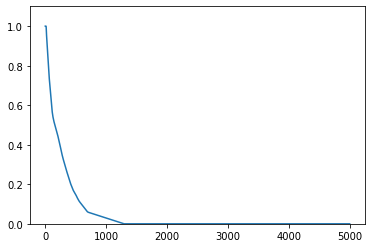

In [79]:
x = list(range(1,5001))
plt.ylim([0, 1.1])
plt.plot(x, long_single_arr)

In [9]:
a = [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
output = []
i = 0
space = 0
for ii in a:
    if a[i] == 1:
        output.append(space)
        space = 0
    elif a[i] == 0:
        space += 1
    i += 1
print(output)

[0, 2, 1, 5]


In [13]:
a = [False, True, False, False, False, True, False, True, True, False, False, True, True, True, True, True, False]
# a = [False, False]
# a = [True, True]
#      0      1      2      3      4     5     6     7     8      9      10    11    12    13    14    15     16
true_res = [[0, 0], [2, 4], [6, 6], [9, 10], [16, 16]]
out = []
pair = []
for i in range(len(a)):
    if i == 0:
        prev = True
    else:
        prev = a[i-1]   
    if a[i]==False and prev==True:
        pair.append(i)
    if a[i]==True and prev==False:
        pair.append(i-1)
        out.append(pair)
        pair=[]
    if i == len(a)-1 and a[i]==False:
        pair.append(i)
        out.append(pair)
        pair=[]
    
chr_name = "chr1"
print(true_res)
print(out)
for i in out:
#     print(i)
    print(chr_name + '\t' + str(i[0]) + '\t' + str(i[1] + 1))

[[0, 0], [2, 4], [6, 6], [9, 10], [16, 16]]
[[0, 0], [2, 4], [6, 6], [9, 10], [16, 16]]
chr1	0	1
chr1	2	5
chr1	6	7
chr1	9	11
chr1	16	17


In [47]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mul.wig', sep='\t')
mul_arr = mul[str(mul.columns[0])]

mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mur.wig', sep='\t')
mur_arr = mur[str(mur.columns[0])]

chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])

def singleMap(read_length:int, mul_arr, mur_arr):
    single_logic = []
    for i in range(len(mul_arr)):
        if i + read_length - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + read_length - 1] <= read_length:
            single_logic.append(True) # Read maps uniquely
        else:
            single_logic.append(False) # Read does not map uniquely
    return single_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

start = 56
x = 150
single_res = singleMap(x, mul_arr, mur_arr)
single_arr = array_to_bed(single_res)
# print(single_res)
# print(len(single_res))
# print(single_arr)

for i in single_arr:
    print(chr_name + '\t' + str(i[0] + spacing) + '\t' + str(i[1] + spacing + 1))

chr1	59	138
chr1	176	741
chr1	885	933
chr1	1071	1430
chr1	2718	3083
chr1	3226	3232
chr1	3382	3425
chr1	3575	3585
chr1	3802	3851
chr1	4009	5204
chr1	5415	5446
chr1	5596	5838
chr1	5988	6390
chr1	6540	7101
chr1	7371	7388
chr1	7470	8356
chr1	8584	9264
chr1	9575	9586
chr1	9706	9907


In [46]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mul.wig', sep='\t')
mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mur.wig', sep='\t')

# chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
# spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])

mul = mul.iloc[56:].reset_index()
mul_arr = mul[str(mul.columns[0])]

mur = mur.iloc[:-56]
mur_arr = mur[str(mur.columns[0])]

#chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
chr_name = "chr1"
#spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])
# spacing = 0
spacing = 56

def singleMap_bed(read_length:int, mul_arr, mur_arr):
    out = []
    pair = []
    prev = True
    for i in range(len(mul_arr)):
        if i + read_length - 1 > len(mur_arr) - 1:
            if not prev:
                pair.append(i)
                out.append(pair)
                pair=[]
                break
        if mul_arr[i] <= read_length or \
        mur_arr[i + read_length - 1] <= read_length:
            flag = True # Read maps uniquely
            if not prev:
                pair.append(i-1)
                out.append(pair)
                pair=[]
            #single_logic.append(True) # Read maps uniquely
        else:
            flag = False # Read does not map uniquely
            if prev:
                pair.append(i)
            #single_logic.append(False) # Read does not map uniquely
        prev = flag
    return out

def singleMap(read_length:int, mul_arr, mur_arr):
    single_logic = []
    for i in range(len(mul_arr)):
        if i + read_length - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + read_length - 1] <= read_length:
            single_logic.append(True) # Read maps uniquely
        else:
            single_logic.append(False) # Read does not map uniquely
    return single_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

start = 56
x = 150
# single_res = singleMap(x, mul_arr, mur_arr)
# single_arr = array_to_bed(single_res)
single_res = singleMap_bed(x, mul_arr, mur_arr)
# print(single_res)
# print(len(single_res))
# print(single_arr)

for i in single_arr:
    print(chr_name + '\t' + str(i[0] + spacing) + '\t' + str(i[1] + spacing + 1))

chr1	176	741
chr1	885	933
chr1	1071	1430
chr1	2718	3083
chr1	3226	3232
chr1	3382	3425
chr1	3575	3585
chr1	3802	3851
chr1	4009	5204
chr1	5415	5446
chr1	5596	5838
chr1	5988	6390
chr1	6540	7101
chr1	7371	7388
chr1	7470	8356
chr1	8584	9264
chr1	9575	9586
chr1	9706	9850


In [ ]:
Точно не картируются SE 150
[59-138]
[176-200]
или в bed [59-139)
           [176-200)

In [ ]:
chr1	176	741
chr1	885	933
chr1	1071	1430
chr1	2718	3083
chr1	3226	3232
chr1	3382	3425
chr1	3575	3585
chr1	3802	3851
chr1	4009	5204
chr1	5415	5446
chr1	5596	5838
chr1	5988	6390
chr1	6540	7101
chr1	7371	7388
chr1	7470	8356
chr1	8584	9264
chr1	9575	9586
chr1	9706	9850

In [4]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mul.wig', sep='\t')
mul_short = mul.iloc[56:].reset_index()
mul_arr = mul_short[str(mul_short.columns[0])]
# mul
# mul_short
mul_arr

0         56
1         57
2         58
3         59
4         60
        ... 
9938    9994
9939    9995
9940    9996
9941    9997
9942    9998
Name: index, Length: 9943, dtype: int64

In [3]:
mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mur.wig', sep='\t')
mur_short = mur.iloc[:-56]
mur_arr = mur_short[str(mur_short.columns[0])]
mur_arr

0        50
1        51
2        52
3        53
4        45
       ... 
9938    290
9939    291
9940    292
9941    293
9942    294
Name: fixedStep chrom=chr1 start=56 step=1, Length: 9943, dtype: int64

In [4]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mul.wig', sep='\t')
mul_arr = mul[str(mul.columns[0])]

mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.aligned.mur.wig', sep='\t')
mur_arr = mur[str(mur.columns[0])]

chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])

def pairMap(read_length:int, fragment_length:int, fragment_std:int, mul_arr, mur_arr):
    np.random.seed(0)
    pair_logic = []
    distr = np.random.normal(fragment_length, fragment_std, len(mul_arr))
    for i in range(len(mul_arr)):
        if i + int(distr[i]) - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + int(distr[i]) - 1] <= read_length:
            pair_logic.append(True) # Read maps uniquely
        else:
            pair_logic.append(False) # Read does not map uniquely
    return pair_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

start = 56
min_read_length = 150

pair_res = pairMap(min_read_length, 700, 50, mul_arr, mur_arr)
pair_arr = array_to_bed(pair_res)

# print(single_res)
# print(len(single_res))
# print(single_arr)

for i in pair_arr:
    print(chr_name + '\t' + str(i[0] + spacing) + '\t' + str(i[1] + spacing))

chr1	59	79
chr1	81	98
chr1	100	137
chr1	177	177
chr1	180	182
chr1	186	186
chr1	188	190
chr1	193	193
chr1	195	196
chr1	202	202
chr1	204	205
chr1	208	209
chr1	211	211
chr1	213	214
chr1	220	220
chr1	222	223
chr1	230	230
chr1	237	237
chr1	239	239
chr1	241	242
chr1	246	246
chr1	249	249
chr1	254	254
chr1	261	261
chr1	292	293
chr1	302	303
chr1	310	311
chr1	315	315
chr1	322	322
chr1	326	327
chr1	329	329
chr1	332	332
chr1	340	341
chr1	344	344
chr1	350	350
chr1	352	353
chr1	355	355
chr1	358	358
chr1	361	361
chr1	365	366
chr1	370	377
chr1	381	382
chr1	384	384
chr1	394	394
chr1	397	400
chr1	406	407
chr1	409	410
chr1	425	425
chr1	427	427
chr1	433	433
chr1	436	436
chr1	441	441
chr1	443	444
chr1	449	449
chr1	454	454
chr1	460	460
chr1	470	470
chr1	474	476
chr1	478	478
chr1	482	483
chr1	488	488
chr1	492	492
chr1	494	494
chr1	500	500
chr1	502	502
chr1	507	511
chr1	514	514
chr1	519	519
chr1	521	521
chr1	525	525
chr1	530	532
chr1	534	537
chr1	540	540
chr1	542	545
chr1	547	551
chr1	553	553
chr1	555	561
chr

In [54]:
mul = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mul.wig', sep='\t')
mur = pd.read_csv('/Users/pavel/Desktop/PROJECTS/hooman/test.chr1.mur.wig', sep='\t')

chr_name = list(mul.columns.values)[0].split(' ')[1].split('=')[1]
spacing = int(list(mul.columns.values)[0].split(' ')[2].split('=')[1])

mul_short = mul.iloc[56:].reset_index()
mul_arr = mul_short[str(mul_short.columns[0])]
mur_short = mur.iloc[:-56]
mur_arr = mur_short[str(mur_short.columns[0])]


def pairMap(read_length:int, fragment_length:int, fragment_std:int, mul_arr, mur_arr):
    np.random.seed(0)
    pair_logic = []
    distr = np.random.normal(fragment_length, fragment_std, len(mul_arr))
    for i in range(len(mul_arr)):
        if i + int(distr[i]) - 1 > len(mur_arr) - 1:
            break
        if mul_arr[i] <= read_length or \
        mur_arr[i + int(distr[i]) - 1] <= read_length:
            pair_logic.append(True) # Read maps uniquely
        else:
            pair_logic.append(False) # Read does not map uniquely
    return pair_logic

def array_to_bed(arr):
    out = []
    pair = []
    for i in range(len(arr)):
        if i == 0:
            prev = True
        else:
            prev = arr[i-1]   
        if arr[i]==False and prev==True:
            pair.append(i)
        if arr[i]==True and prev==False:
            pair.append(i-1)
            out.append(pair)
            pair=[]
        if i == len(arr)-1 and arr[i]==False:
            pair.append(i)
            out.append(pair)
            pair=[]
    return out

start = 56
min_read_length = 150

pair_res = pairMap(min_read_length, 700, 50, mul_arr, mur_arr)
pair_arr = array_to_bed(pair_res)

# print(single_res)
# print(len(single_res))
# print(single_arr)

for i in pair_arr:
    print(chr_name + '\t' + str(i[0] + spacing) + '\t' + str(i[1] + spacing))

chr1	4444	4444
chr1	4501	4501
chr1	4525	4525
chr1	4527	4527
chr1	4531	4531
chr1	4534	4534
chr1	4537	4537
chr1	4545	4545
chr1	4547	4547
chr1	4550	4550
chr1	4562	4562
chr1	4565	4565
chr1	4567	4567
chr1	4569	4569
chr1	4571	4571
chr1	4573	4575
chr1	4578	4578
chr1	4585	4586
chr1	4596	4596
chr1	4599	4600
chr1	4603	4603
chr1	4607	4607
chr1	4613	4613
chr1	4616	4616
chr1	4618	4618
chr1	4622	4623
chr1	4627	4627
chr1	4648	4648
chr1	4655	4655
chr1	4662	4662
chr1	4666	4666
chr1	4675	4675


In [48]:
enumerate(a)